#Introduction to PyTorch Lightning 

Author: Yujing Zou

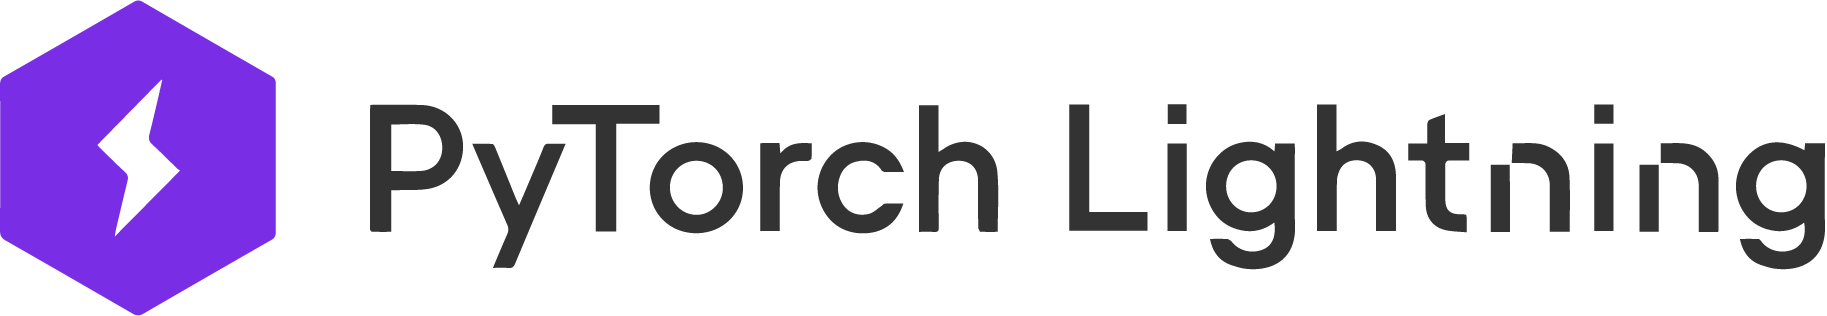

[Pytorch lightning read the docs](https://pytorch-lightning.readthedocs.io/en/stable/)

[Pytorch lightning tutorial from its creator](https://www.pytorchlightning.ai/tutorials)

[PyTorch Lightning for Dummies - A Tutorial and Overview](https://www.assemblyai.com/blog/pytorch-lightning-for-dummies/) 

[Awesome PyTorch Lightning template](https://towardsdatascience.com/awesome-pytorch-lightning-template-485a75c2f47e)

In [ ]:
! pip install pytorch

In [ ]:
! pip install pytorch-lightning

*Warning*: the `import pytorch_lightning as pl` only seems to work well if the runtime type is set to None. 

In [19]:
import pytorch_lightning as pl

In [ ]:
import os
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl

Pytorch Lightning is a wrapper that's like the TPOT AutoML thing but for Pytorch. I plan on showing something that's already implemented in a "past" workshop, use the same dataset (I thought today's medMNIST would be a decent choice), but modify the same code into a "PyTorch Lightning" version and show its convinience in implementation and how it allows one to focus on the science and ideas

[William Falcon on the birth of Pytorch Lightning](https://www.youtube.com/watch?v=MKhqe1jJ8Zo)

[From Pytorch to Pytorch lightning](https://www.youtube.com/watch?v=DbESHcCoWbM)

[Tutorial](https://www.youtube.com/watch?v=Hgg8Xy6IRig&t=732s)

# What is PyTorch Lightning



# Objectives: From PyTorch to PyTorch Lightning 

Let's re-use the MedMNIST from a previous workshop where we built our fist image classifer. Then we will re-write that code with the Pytorch lightning integratead with WanDB to demonstrate their "wrapper" usage and how it speeds up the experimenation process of idea testing optimization in deep learning research.  

[Reference to previous workshop: Deep learning framework _ implement Your Own Image classifier.ipynb](https://colab.research.google.com/drive/1g3Gpym55TuPGoG_vfokatSI_QjkID2kd?usp=sharing)

- What is Pytorch Lightning compared to PyTorch
- A reminder of basics of writing a neural network in Vanilla PyTorch
- A simple example of transforming MNIST PyTorch code to PyTorch Lightning code to get a taste of it 
- A use case of transforming week 4-2 workshop: implement your own image classifier PyTorch code into PyTorch lightning code with the MedMNIST dataset 




#Reminders on steps to build a neural network in PyTorch 
## [Read more](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)  
- Reminder (quickstart) of how to define a neural network in Pytorch (creating models) by using the `nn.Module` function. We define the layers of the network in the `__init__` function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available. 

- Optimizing the Model Parameters: To train a model, we need a loss function and an optimizer. Therefore need to define a loss function (Cross Entropy loss function for example or other chosen function [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)), then define an optimizer (for example: [`torch.optim.SGD`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)). 

- In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.
  - compute prediction error: calculate the model prediction that's been previously defined, and computes the loss (prediction error from that) with the previuosly defined loss function 
  - adjusting the model parameters by backpropogations with the optimizer that has been previously defined. For example with [`optimizer.zero_grad()`](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html); [`tensor.backward`](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html);[`torch.optim`, `optimizer.step()` where all optimizers implement a `step()` method that updates the parameters](https://pytorch.org/docs/stable/optim.html);   

- Look at the [Pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) for any Pytorch functionalities (`torch.nn.Flatten for example`); [`torch.nn`](https://pytorch.org/docs/stable/nn.html);[`torch.nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html); [`torch.nn.linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear); [`torch.nn.ReLu`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU); [`torch.nn.functional`](https://pytorch.org/docs/stable/nn.functional.html); 
  - "A sequential container. Modules will be added to it in the order they are passed in the constructor. Alternatively, an OrderedDict of modules can be passed in. The forward() method of Sequential accepts any input and forwards it to the first module it contains. It then “chains” outputs to inputs sequentially for each subsequent module, finally returning the output of the last module.

  - The value a Sequential provides over manually calling a sequence of modules is that it allows treating the whole container as a single module, such that performing a transformation on the Sequential applies to each of the modules it stores (which are each a registered submodule of the Sequential)."

- Great tutorials from the PyTorch documentations
  - [Deep learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
    - [Tensors](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
    - [`torch.autograd`](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)
      - Neural networks (NNs) are a collection of nested functions that are executed on some input data. These functions are defined by parameters (consisting of weights and biases), which in PyTorch are stored in tensors.

      - Training a NN happens in two steps:

      - Forward Propagation: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.

      - Backward Propagation: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent. For a more detailed walkthrough of backprop, check out this video from 3Blue1Brown.
    - [Neural Networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)
      - A typical training procedure for a neural network is as follows:

        - Define the neural network that has some learnable parameters (or weights)
        - Iterate over a dataset of inputs
        - Process input through the network
        - Compute the loss (how far is the output from being correct)
        - Propagate gradients back into the network’s parameters
        - Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient
    - [Training a classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) example: 
      - We will do the following steps in order:

        - Load and normalize the CIFAR10 training and test datasets using `torchvision`
        - Define a Convolutional Neural Network
        - Define a loss function
          - use a Classification Cross-Entropy loss and SGD with momentum for example
        - Train the network on the training data
          -loop over our data iterator (looping over the dataset multiple times), and feed the inputs to the network and optimize.
        - Test the network on the test data


  - [3Blue1Brown Neural Networks 4 episode videos](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) 
  - [McMedHacks week 3-1 lecture on Introduction to Deep Learning, especially slides 39 - 50 on backpropagation](https://docs.google.com/presentation/d/1tF86dFqV288I9wqHszj8TVmvMnfPeEfowIMJpd8Ic9Y/edit?usp=sharing) 








# Simplest MNIST PyTorch Example 

In [ ]:
import torch 
from torch import nn 
from torch import optim 
from torchvision import datasets, transforms 
from torch.utils.data import random_split, DataLoader

In [ ]:
model = nn.Sequential(
    nn.Linear(28*28, 64), # MNIST is 28x28 pixels
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    # nn.Dropout(0.1) # in case we are overfitting
    nn.Linear(64,10) # 10 classes 
)

In [ ]:
# Defining optimizer 
params = model.parameters()
optimiser = optim.SGD(params, lr = 1e-2)



In [ ]:
# Defining loss function to train the parameters 
loss = nn.CrossEntropyLoss()


Get data 

In [ ]:
# Train, Val split
train_data = datasets.MNIST('data', train = True, download = True, transform = transforms.ToTensor())
train, val = random_split(train_data, [55000,5000])
train_loader = DataLoader(train, batch_size=32)
val_loader = DataLoader(val, batch_size=32)


100%|██████████| 9912422/9912422 [00:00<00:00, 82441109.89it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 3664005.74it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21031494.20it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12080233.84it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# Training and validation loops
nb_epochs = 5 

for epoch in  range(nb_epochs):
  losses = list()
  for batch in train_loader: 
    # x is the image, y is the label
    x, y = batch # from each batch taken from the data loader 

    # x: batch size * 1 channel * 28 * 28, which needs to be converetd into a vector using the x.view ()
    b = x.size(0)
    x = x.view(b,-1)
    # Five steps of training 

    # 1: Forward 
    l = model(x) # l is logits

    # 2: compute the objective function 
    J = loss(l, y) # loss function 

    # 3: cleaning the gradients to prepare for step 4
    model.zero_grad()
    # equivalent: 
    # optmiser.zero_grad()
    # params.grad._zeros()

    # 4: accumulate the partial derivatives of J with respect to parameters 
    J.backward()
    # essentially 
    # params.grad.add_(dJ/dparams)

    # 5: step in the opposite direction of the gradient: backpropogation (where the learning happens)
    optimiser.step()  
    # an equivalent parameters update: 
    # with torch.no_grad(): paraams = params - sta * params.grad 

    losses.append(J.item())

  print(f' Epoch {epoch + 1}, tarin loss: {torch.tensor(losses).mean():.2f}') 

# Validation loops (similar lines to the above but just the forward and objective / loss/ cost function step)

  losses = list()
  for batch in val_loader: 
    # x is the image, y is the label
    x, y = batch # from each batch taken from the data loader 

    # x: batch size * 1 channel * 28 * 28, which needs to be converetd into a vector using the x.view ()
    b = x.size(0)
    x = x.view(b,-1)
    # Five steps of training 

    # 1: Forward; no gradient computed such that J is just a tensor with no graph connected 
    with torch.no_grad():
      l = model(x)


    # 2: compute the objective function 
    J = loss(l, y) # loss function 

    losses.append(J.item())

  print(f'Epoch{epoch + 1}, validation loss: {torch.tensor(losses).mean():.2f}')


 Epoch 1, tarin loss: 1.23
Epoch1, validation loss: 0.50
 Epoch 2, tarin loss: 0.41
Epoch2, validation loss: 0.36
 Epoch 3, tarin loss: 0.33
Epoch3, validation loss: 0.32
 Epoch 4, tarin loss: 0.29
Epoch4, validation loss: 0.29
 Epoch 5, tarin loss: 0.26
Epoch5, validation loss: 0.26


# Slightly fancier MNIST PyTorch Example 
with a ResNET

In [20]:
# replica of the last section 
import torch 
from torch import nn 
from torch import optim 
from torchvision import datasets, transforms 
from torch.utils.data import random_split, DataLoader



In [21]:
# Train, Val split
train_data = datasets.MNIST('data', train = True, download = True, transform = transforms.ToTensor())
train, val = random_split(train_data, [55000,5000])
train_loader = DataLoader(train, batch_size=32)
val_loader = DataLoader(val, batch_size=32)


In [22]:
# Slightly fancier (more flexible) MNIST PyTorch Example 
model = nn.Sequential(
    nn.Linear(28*28, 64), # MNIST is 28x28 pixels
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Dropout(0.1), # in case we are overfitting
    nn.Linear(64,10) # 10 classes 
)


In [23]:
# Define a more flexible model

class ResNet(nn.Module):
  def __init_(self):
    super().__init__()
    self.l1 = nn.Linear(28 * 28, 64)
    self.l2 = nn.Linear(64, 64)
    self.l3 = nn.Linear(64, 10)
    self.do = nn.Dropout(0.1)
  
  def forward(self, x):
    h1 = nn.functional.relu(self.l1(x))
    h2 = nn.functional.relu(self.l2(h1))
    do = self.do(h2 + h1)
    logits = self.l3(do)
    return logits

model = ResNet().cuda()

In [24]:
# params = list(nn.ParameterList())
##params = list(model.parameters())
optimizer = optim.SGD(params, lr = 1e-2)

ValueError: ignored

In [ ]:
# Define loss used to update the parameters 
loss = nn.CrossEntropyLoss()


In [ ]:
# Training and validation loops
nb_epochs = 5 

for epoch in  range(nb_epochs):
  losses = list()
  accuracies = list()
  model.train()
  for batch in train_loader: 
    # x is the image, y is the label
    x, y = batch # from each batch taken from the data loader 

    # x: batch size * 1 channel * 28 * 28, which needs to be converetd into a vector using the x.view ()
    b = x.size(0)
    x = x.view(b,-1)

    # Five steps of training 

    # 1: Forward 
    l = model(x) # l is logits

    # 2: compute the objective function 
    J = loss(l, y) # loss function 

    # 3: cleaning the gradients to prepare for step 4
    model.zero_grad()
    # equivalent: 
    # optmiser.zero_grad()
    # params.grad._zeros()

    # 4: accumulate the partial derivatives of J with respect to parameters 
    J.backward()
    # essentially 
    # params.grad.add_(dJ/dparams)

    # 5: step in the opposite direction of the gradient: backpropogation (where the learning happens)
    optimiser.step()  
    # an equivalent parameters update: 
    # with torch.no_grad(): paraams = params - sta * params.grad 

    losses.append(J.item())
    accuracies.append(y.eq(l.detach().argmax(dim=1)).float().mean())

  print(f'Epoch {epoch + 1}', end = ', ')
  print(f'tarin loss: {torch.tensor(losses).mean():.2f}') 
  print(f'training accuracy: {torch.tensor(accuracies).mean():.2f}')

# Validation loops (similar lines to the above but just the forward and objective / loss/ cost function step)

  losses = list()
  accuracies = list()
  model.eval()


  for batch in val_loader: 
    # x is the image, y is the label
    x, y = batch # from each batch taken from the data loader 

    # x: batch size * 1 channel * 28 * 28, which needs to be converetd into a vector using the x.view ()
    b = x.size(0)
    x = x.view(b,-1)
    # Five steps of training 

    # 1: Forward; no gradient computed such that J is just a tensor with no graph computed 
    with torch.no_grad():
      l = model(x)


    # 2: compute the objective function 
    J = loss(l, y) # loss function 

    losses.append(J.item())
    accuracies.append(y.eq(l.detach().argmax(dim=1)).float().mean())

  print(f'Epoch {epoch + 1}', end = ', ')
  print(f'validation loss: {torch.tensor(losses).mean():.2f}') 
  print(f'validation accuracy: {torch.tensor(accuracies).mean():.2f}')


# A Pytorch Lightning example
Adapted from this [MNIST Pytorch Lightning intro](https://colab.research.google.com/drive/1RovSCh6O-15gB8sAcvt5mgEv-457PqTa?authuser=1#scrollTo=8c5149be)

[AssemblyAI blog reference](https://www.assemblyai.com/blog/pytorch-lightning-for-dummies/) 

- Pytorch lightning allows you to focus on the production idea protopying (the training part: first two of the five steps of training) where you experiment and get fast results to see if things could worK. You won't need to spend as much time in building the training and validation loops, it automates it, including progress bars, automatic detection and selection of hardwares, and even automatic checkpoint logging as you experiment (everytime you do a new experiemnt running a model, that model is automatically saved without you explicitly calling / writing code for it) 

- Lightning vs. Vanilla
PyTorch Lightning is built on top of ordinary (vanilla) PyTorch. The purpose of Lightning is to provide a research framework that allows for fast experimentation and scalability, which it achieves via an OOP approach that removes boilerplate and hardware-reference code. This approach yields a litany of benefits.

- Lightning Module Components
A lightning module is composed of six components which fully define the system:

  - The model or system of models
  - The optimizer(s)
  - The train loop
  - The validation loop
  - The test loop
  - The prediction loop
Only the essential features of each of these components is defined in its respective class/function. This removal of boilerplate permits cleaner code and lowered probability of making a trivial error; however, any part of training (such as the backward pass) can be overridden to maintain flexibility.

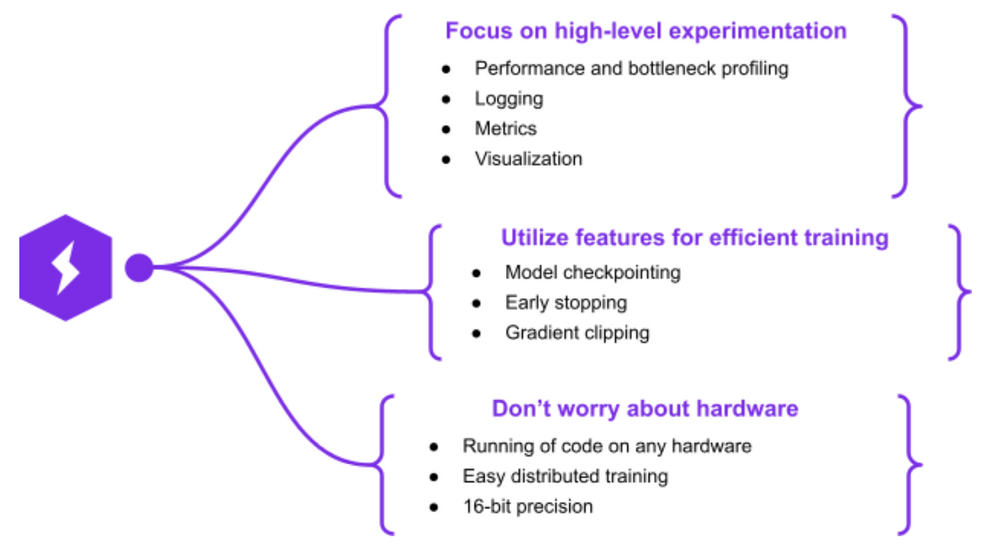

## Setup
This notebook requires some packages besides pytorch-lightning.

In [ ]:
! pip install --quiet "seaborn" "pytorch-lightning>=1.4" "ipython[notebook]" "torch>=1.6, <1.9" "pandas" "torchvision" "torchmetrics>=0.6"

     |████████████████████████████████| 585 kB 29.3 MB/s 
     |████████████████████████████████| 804.1 MB 2.8 kB/s 
     |████████████████████████████████| 419 kB 70.4 MB/s 
     |████████████████████████████████| 596 kB 68.0 MB/s 
     |████████████████████████████████| 140 kB 76.7 MB/s 
     |████████████████████████████████| 1.1 MB 51.5 MB/s 
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
     |████████████████████████████████| 23.3 MB 1.2 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 17.4 MB 197 kB/s 
     |████████████████████████████████| 271 kB 72.8 MB/s 
     |████████████████████████████████| 144 kB 75.6 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
ERROR: pip's de

In [ ]:
pip install pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-g9dl38za/pytorch_6c2c731d6d354970a024944c23d66d32/setup.py'"'"'; __file__='"'"'/tmp/pip-install-g9dl38za/pytorch_6c2c731d6d354970a024944c23d66d32/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-peltobap/install-record.txt --single-version-externally-managed --compile --install-headers /usr/

In [ ]:
import os

import pandas as pd
import seaborn as sn
import torch
from IPython.core.display import display
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy
from torchvision import transforms
from torchvision.datasets import MNIST

PATH_DATASETS = os.environ.get("PATH_DATASETS", ".")
BATCH_SIZE = 256 if torch.cuda.is_available() else 64

## Simplest example

To illustrate a point  

Here's the simplest most minimal example with just a training loop (no validation, no testing).

**Keep in Mind** - A `LightningModule` *is* a PyTorch `nn.Module` - it just has a few more helpful features.

In [ ]:
class MNISTModel(LightningModule):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(28 * 28, 10)

    def forward(self, x):
        return torch.relu(self.l1(x.view(x.size(0), -1)))

    def training_step(self, batch, batch_nb):
      # The only two steps you really care about when experimenting new ideas, the training part 
        x, y = batch
        loss = F.cross_entropy(self(x), y)
        return loss
      
      # PyTorch Lightning automatically does steps 3 to 5: cleaning the gradients with zero_grad(), accumulate the partial derivatives of J wrt params, and step in the oppositive direction of the gradient
      # Therefore no need to write code in training loops and validations loops 
      # PL can also do automatic early stopping based on validation losses 
      # Other tricks 
      

    def configure_optimizers(self): # defining optimiser "within" the model
        return torch.optim.Adam(self.parameters(), lr=0.02)

By using the `Trainer` you automatically get:
1. Tensorboard logging
2. Model checkpointing
3. Training and validation loop
4. early-stopping

[short PL trick tutorials](https://www.pytorchlightning.ai/tutorials) 

In [ ]:
# Init our model
mnist_model = MNISTModel()

# Init DataLoader from MNIST Dataset
train_ds = MNIST(PATH_DATASETS, train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE)

# Initialize a trainer
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=3,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
)

# Train the model ⚡
trainer.fit(mnist_model, train_loader)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: /content/lightning_logs

  | Name | Type   | Params
--------------------------------
0 | l1   | Linear | 7.9 K 
--------------------------------
7.9 K     Trainable params
0         Non-trainable params
7.9 K     Total params
0.031     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

## A more complete MNIST Lightning Module Example

That wasn't so hard was it?

Now that we've got our feet wet, let's dive in a bit deeper and write a more complete `LightningModule` for MNIST...

This time, we'll bake in all the dataset specific pieces directly in the `LightningModule`.
This way, we can avoid writing extra code at the beginning of our script every time we want to run it.

---

### Note what the following built-in functions are doing:

1. [prepare_data()](https://pytorch-lightning.readthedocs.io/en/stable/common/lightning_module.html#prepare-data) 💾
    - This is where we can download the dataset. We point to our desired dataset and ask torchvision's `MNIST` dataset class to download if the dataset isn't found there.
    - **Note we do not make any state assignments in this function** (i.e. `self.something = ...`)

2. [setup(stage)](https://pytorch-lightning.readthedocs.io/en/stable/common/lightning_module.html#setup) ⚙️
    - Loads in data from file and prepares PyTorch tensor datasets for each split (train, val, test).
    - Setup expects a 'stage' arg which is used to separate logic for 'fit' and 'test'.
    - If you don't mind loading all your datasets at once, you can set up a condition to allow for both 'fit' related setup and 'test' related setup to run whenever `None` is passed to `stage` (or ignore it altogether and exclude any conditionals).
    - **Note this runs across all GPUs and it *is* safe to make state assignments here**

3. [x_dataloader()](https://pytorch-lightning.readthedocs.io/en/stable/api_references.html#core-api) ♻️
    - `train_dataloader()`, `val_dataloader()`, and `test_dataloader()` all return PyTorch `DataLoader` instances that are created by wrapping their respective datasets that we prepared in `setup()`

In [ ]:
class LitMNIST(LightningModule):
    def __init__(self, data_dir=PATH_DATASETS, hidden_size=64, learning_rate=2e-4):

        super().__init__()

        # Set our init args as class attributes
        self.data_dir = data_dir
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate

        # Hardcode some dataset specific attributes
        self.num_classes = 10
        self.dims = (1, 28, 28)
        channels, width, height = self.dims
        self.transform = transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,)),
            ]
        )

        # Define PyTorch model
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(channels * width * height, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size, self.num_classes),
        )

        self.val_accuracy = Accuracy()
        self.test_accuracy = Accuracy()

    def forward(self, x):
        x = self.model(x)
        return F.log_softmax(x, dim=1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = torch.argmax(logits, dim=1)
        self.val_accuracy.update(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", self.val_accuracy, prog_bar=True)

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        preds = torch.argmax(logits, dim=1)
        self.test_accuracy.update(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", self.test_accuracy, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    ####################
    # DATA RELATED HOOKS
    ####################

    def prepare_data(self):
        # download
        MNIST(self.data_dir, train=True, download=True)
        MNIST(self.data_dir, train=False, download=True)

    def setup(self, stage=None):

        # Assign train/val datasets for use in dataloaders
        if stage == "fit" or stage is None:
            mnist_full = MNIST(self.data_dir, train=True, transform=self.transform)
            self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])

        # Assign test dataset for use in dataloader(s)
        if stage == "test" or stage is None:
            self.mnist_test = MNIST(self.data_dir, train=False, transform=self.transform)

    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=BATCH_SIZE)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=BATCH_SIZE)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=BATCH_SIZE)

In [ ]:
model = LitMNIST()
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=3,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=CSVLogger(save_dir="logs/"),
)
trainer.fit(model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: logs/lightning_logs

  | Name          | Type       | Params
---------------------------------------------
0 | model         | Sequential | 55.1 K
1 | val_accuracy  | Accuracy   | 0     
2 | test_accuracy | Accuracy   | 0     
---------------------------------------------
55.1 K    Trainable params
0         Non-trainable params
55.1 K    Total params
0.220     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

### Testing

To test a model, call `trainer.test(model)`.

Or, if you've just trained a model, you can just call `trainer.test()` and Lightning will automatically
test using the best saved checkpoint (conditioned on val_loss).

In [ ]:
trainer.test()

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1447: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  f"`.{fn}(ckpt_path=None)` was called without a model."
Restoring states from the checkpoint path at logs/lightning_logs/version_0/checkpoints/epoch=2-step=2580.ckpt
Loaded model weights from checkpoint at logs/lightning_logs/version_0/checkpoints/epoch=2-step=2580.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9480999708175659
        test_loss           0.17206332087516785
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_acc': 0.9480999708175659, 'test_loss': 0.17206332087516785}]